In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import pickle

In [2]:
data = pd.read_csv("loanapprove.CSV")

In [3]:
data.shape

(614, 13)

In [4]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [7]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 614
Number of columns 13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
609            False              False       False             False   
610            False              False       False             False   
611            False              False       False             False   
612            False              False       False             False   
613            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
609           False          False        False  
610           False          False        False  
611           False          False        False  
612           False          False        False  
613           False          False        False  

[614 rows x 13 columns]

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
data = data.drop('Loan_ID',axis=1)

In [13]:
data.head(1)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y

In [14]:
columns=['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [15]:
data = data.dropna(subset=columns)   

In [16]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [17]:
data['Self_Employed'].mode()[0]

'No'

In [18]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [19]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [20]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
data['Credit_History'].mode()[0]

1.0

In [22]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [23]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [24]:
data.head(5)

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y

# Data Analysis and Visualization

Number of people who take loan as group by gender
Male      449
Female    104
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

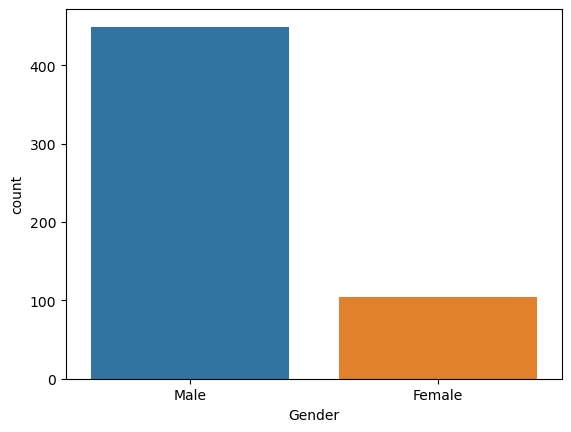

In [25]:
                       # categorical attributes visualization
print("Number of people who take loan as group by gender")
print(data['Gender'].value_counts())
sns.countplot(x = 'Gender' , data = data)

Yes    359
No     194
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

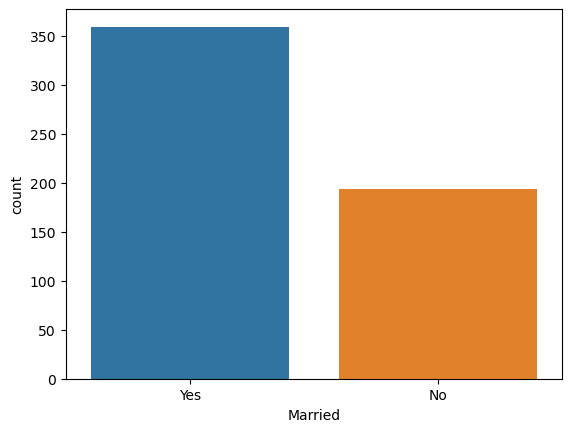

In [26]:
print(data['Married'].value_counts())
sns.countplot(x = 'Married' , data = data)

Graduate        437
Not Graduate    116
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

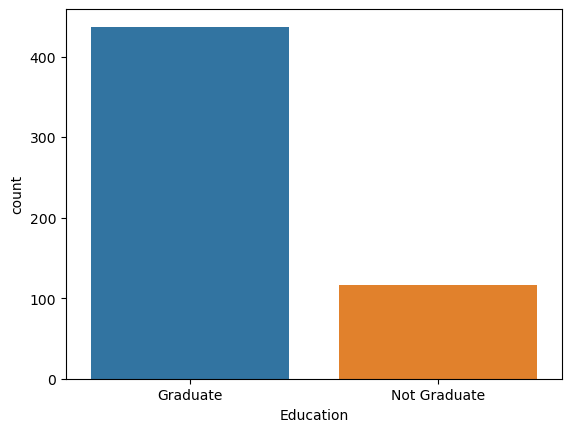

In [27]:
print(data['Education'].value_counts())
sns.countplot(x = 'Education' , data = data)

No     481
Yes     72
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

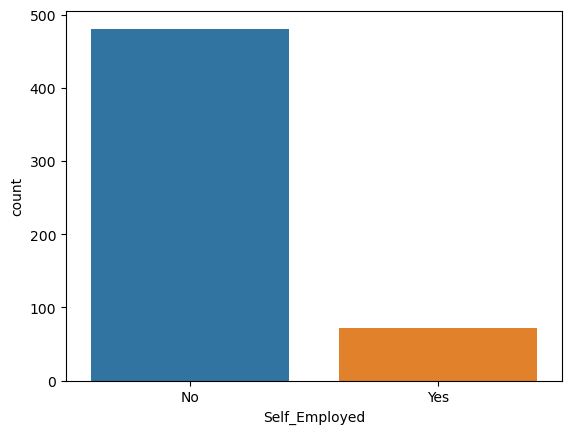

In [28]:
print(data['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed' , data = data)

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

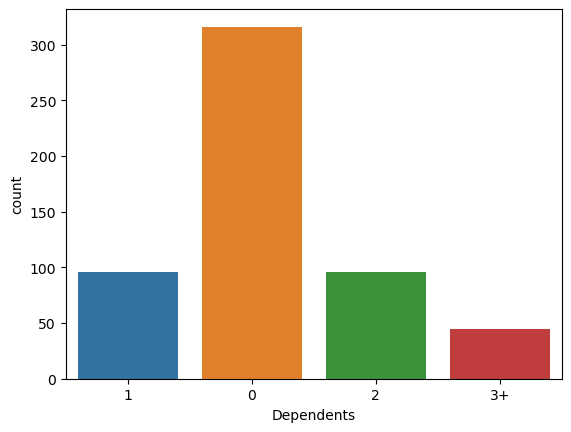

In [29]:
print(data['Dependents'].value_counts())
sns.countplot(x = 'Dependents' , data = data)

1.0    482
0.0     71
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

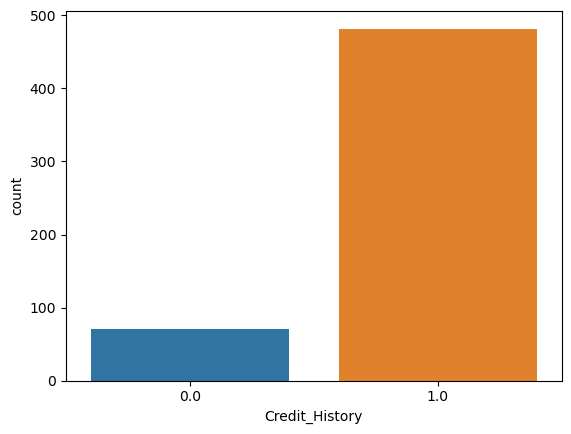

In [30]:
print(data['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History' , data = data)

Y    389
N    164
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

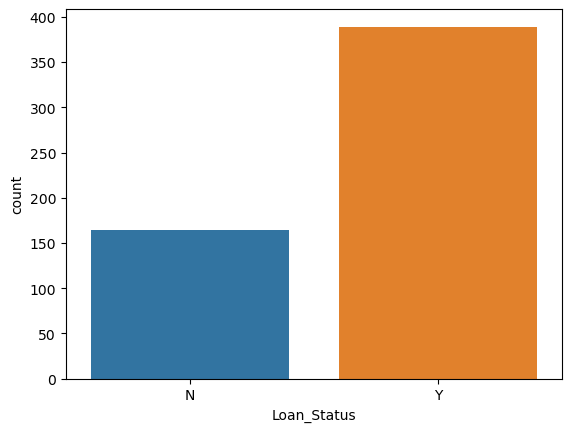

In [31]:
print(data['Loan_Status'].value_counts())
sns.countplot(x = 'Loan_Status' , data = data)

# Textual Parameters In To Numerical

In [32]:
data['Loan_Status'].replace('Y',1,inplace=True)
data['Loan_Status'].replace('N',0,inplace=True)

In [33]:
data['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

In [34]:
data.Gender = data.Gender.map({'Male':1,'Female':0})
data['Gender'].value_counts()

1    449
0    104
Name: Gender, dtype: int64

In [35]:
data.Married=data.Married.map({'Yes':1,'No':0})
data['Married'].value_counts()

1    359
0    194
Name: Married, dtype: int64

In [36]:
data.Dependents = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data['Dependents'].value_counts()

0    316
1     96
2     96
3     45
Name: Dependents, dtype: int64

In [37]:
data.Education = data.Education.map({'Graduate':1,'Not Graduate':0})
data['Education'].value_counts()

1    437
0    116
Name: Education, dtype: int64

In [38]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data['Self_Employed'].value_counts()

0    481
1     72
Name: Self_Employed, dtype: int64

In [39]:
data.Property_Area = data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
data['Property_Area'].value_counts() 

1    215
2    175
0    163
Name: Property_Area, dtype: int64

In [40]:
data['LoanAmount'].value_counts()

120.0    18
110.0    15
100.0    14
187.0    12
128.0    11
         ..
42.0      1
72.0      1
240.0     1
214.0     1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64

In [41]:
data['Loan_Amount_Term'].value_counts()

360.0    473
180.0     40
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
data['Credit_History'].value_counts()

1.0    482
0.0     71
Name: Credit_History, dtype: int64

In [43]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   
5       1        1           2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

# Feature Scaling

In [44]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   
5       1        1           2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

# Store feature matrix in X and Response(Target) in vector y

In [45]:
X = data.drop('Loan_Status',axis=1)

In [46]:
X

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  
1                0  
2                2  
3                2  
4                2  
5                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[553 rows x 11 columns]

In [47]:
y = data['Loan_Status']

In [48]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

In [49]:
cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [50]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols] =st.fit_transform(X[cols])

In [51]:
X

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0        -0.128694   
2         1        1           0          1              1        -0.394296   
3         1        1           0          0              0        -0.464262   
4         1        0           0          1              0         0.109057   
5         1        1           2          1              1         0.011239   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0        -0.411075   
610       1        1           3          1              0        -0.208727   
611       1        1           1          1              0         0.456706   
612       1        1           2          1              0         0.374659   
613       0        0           0          1              1        -0.128694   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1            -0.049699   -0.214368          0.279961             1.0   
2            -0.545638   -0.952675          0.279961             1.0   
3             0.229842   -0.309634          0.279961             1.0   
4            -0.545638   -0.059562          0.279961             1.0   
5             0.834309    1.440866          0.279961             1.0   
..                 ...         ...               ...             ...   
609          -0.545638   -0.893134          0.279961             1.0   
610          -0.545638   -1.262287         -2.468292             1.0   
611          -0.466709    1.274152          0.279961             1.0   
612          -0.545638    0.488213          0.279961             1.0   
613          -0.545638   -0.154828          0.279961             0.0   

     Property_Area  
1                0  
2                2  
3                2  
4                2  
5                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[553 rows x 11 columns]

# Splitting data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
X_train

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
235       1        1           1          1              0         0.025165   
190       1        0           0          0              0        -0.078023   
600       0        0           3          1              0        -0.827851   
8         1        1           2          1              0        -0.225505   
29        0        0           2          1              0        -0.268458   
..      ...      ...         ...        ...            ...              ...   
392       1        1           0          1              0        -0.464262   
283       0        0           0          1              0        -0.593792   
589       1        1           2          1              1        -0.440269   
169       1        1           2          1              0         0.444625   
191       1        0           0          1              0         1.115763   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
235          -0.131259    0.285774          0.279961             1.0   
190          -0.545638   -1.167022          0.279961             1.0   
600          13.157478    2.429244         -2.468292             1.0   
8            -0.043779    0.261958          0.279961             1.0   
29            0.139403   -0.309634          0.279961             1.0   
..                 ...         ...               ...             ...   
392           0.149927   -0.309634          0.279961             1.0   
283           0.002263   -1.095573          0.279961             1.0   
589          -0.545638   -0.476348          0.279961             0.0   
169          -0.545638    0.643019          0.279961             1.0   
191          -0.545638    0.214325          0.279961             1.0   

     Property_Area  
235              0  
190              0  
600              2  
8                2  
29               1  
..             ...  
392              2  
283              2  
589              1  
169              1  
191              1  

[442 rows x 11 columns]

In [54]:
X_test

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
418       1        1           0          1              0        -0.725670   
498       1        1           1          1              1        -0.411914   
260       1        1           1          1              0         0.122983   
330       1        0           1          1              0        -0.162083   
313       1        1           2          1              1         0.066440   
..      ...      ...         ...        ...            ...              ...   
263       0        0           0          1              0         0.310398   
492       1        0           0          0              0        -0.278357   
598       1        1           0          1              1         0.773986   
386       1        0           0          0              0        -0.504027   
468       0        1           2          0              0        -0.862414   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
418           0.366324   -0.404899          0.279961             1.0   
498          -0.545638   -0.607338          0.279961             1.0   
260           0.852069    2.191081          0.279961             1.0   
330           0.044030   -0.345358          0.279961             1.0   
313          -0.545638   -0.023838         -3.934027             1.0   
..                 ...         ...               ...             ...   
263          -0.545638   -0.309634          0.279961             1.0   
492          -0.545638   -0.428715          0.279961             1.0   
598          -0.545638    0.404856          0.279961             1.0   
386          -0.019443   -0.166736          0.279961             1.0   
468           0.413682   -0.571613          0.279961             1.0   

     Property_Area  
418              0  
498              1  
260              2  
330              2  
313              0  
..             ...  
263              0  
492              0  
598              0  
386              1  
468              1  

[111 rows x 11 columns]

In [55]:
y_train

235    1
190    1
600    0
8      1
29     1
      ..
392    1
283    1
589    0
169    1
191    0
Name: Loan_Status, Length: 442, dtype: int64

In [56]:
y_train.shape

(442,)

In [57]:
y_test

418    1
498    1
260    1
330    1
313    1
      ..
263    1
492    1
598    1
386    1
468    1
Name: Loan_Status, Length: 111, dtype: int64

In [58]:
y_test.shape

(111,)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score  
dt = DecisionTreeClassifier(max_depth = 3, random_state = 0)  
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [60]:
dt.predict(X_test)
dt_acc = metrics.accuracy_score(y_test,dt.predict(X_test))

In [61]:
print("Decision Tree accuracy :",dt_acc)

Decision Tree accuracy : 0.8468468468468469


In [62]:
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [63]:
lr =LogisticRegression(learning_rate=0.01, n_iters=1000)
lr.fit(X_train,y_train)

In [64]:
lr.predict(X_test)
lr_acc = metrics.accuracy_score(y_test,lr.predict(X_test))

In [65]:
print("Logistic Regression accuracy :",lr_acc)

Logistic Regression accuracy : 0.7117117117117117


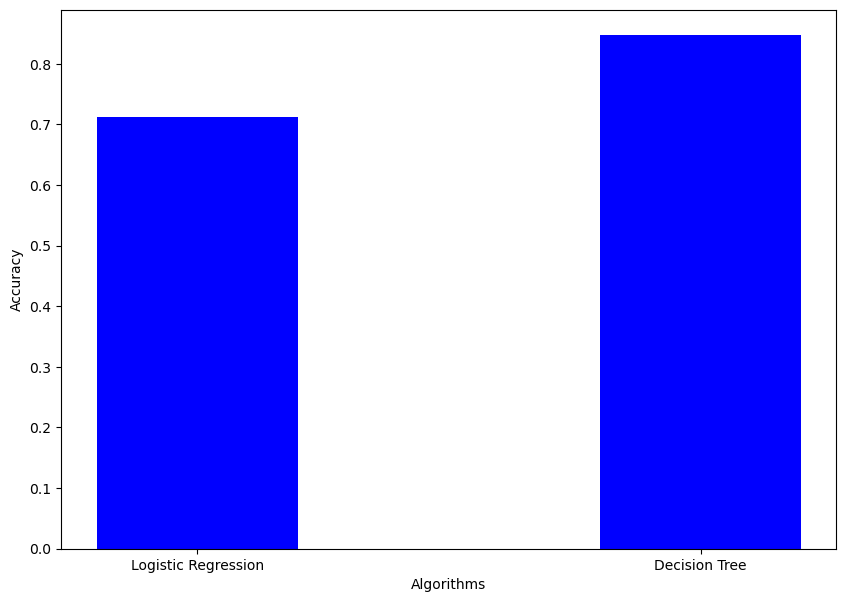

In [66]:
import matplotlib.pyplot as plt

data = {'Logistic Regression': lr_acc, 'Decision Tree': dt_acc}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 7))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
#plt.title("Accuracy")
plt.show()

In [67]:
pickle.dump(dt,open("model.pkl","wb"))

In [68]:
pickle.dump(st,open("scaler.pkl","wb"))

In [69]:
with open('accuracy2.pkl','wb') as f:
    pickle.dump(lr_acc,f)

In [70]:
with open('accuracy1.pkl','wb') as f:
    pickle.dump(dt_acc,f)